In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from nilearn.plotting import plot_design_matrix
from nilearn.plotting import plot_stat_map
from nilearn.glm import threshold_stats_img
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm import threshold_stats_img
from nilearn.plotting import  plot_glass_brain

In [2]:
BASE = "/local/anpa/ds003242-1.0.0"
DERIVATIVES = f"{BASE}/derivatives/"
DERIV_OUT = f"{DERIVATIVES}/firstlevel/"  

In [3]:
all_sub_dirs = sorted([p.name.split("sub-")[-1] for p in Path(DERIV_OUT).glob("sub-*") if p.is_dir()])
all_sub_dirs[:3]

['SAXSISO01b', 'SAXSISO01f', 'SAXSISO01s']

In [4]:
fasting_participants = [s for s in all_sub_dirs if s.endswith("f")]
social_participants = [s for s in all_sub_dirs if s.endswith("s")]
baseline_participants = [s for s in all_sub_dirs if s.endswith("b")]

In [5]:
fasting_maps = [(f"{DERIV_OUT}sub-{s}/food_gt_control_zmap.nii.gz") for s in fasting_participants]
social_maps = [(f"{DERIV_OUT}sub-{s}/food_gt_control_zmap.nii.gz") for s in social_participants]
baseline_maps = [(f"{DERIV_OUT}sub-{s}/food_gt_control_zmap.nii.gz") for s in baseline_participants]

# Fasting VS baseline
## food > control

In [6]:
n_subjects = len(fasting_participants)
n_subjects

31

In [7]:
second_level_input = fasting_maps + baseline_maps
second_level_input

['/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO01f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO02f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO03f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO04f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO08f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO09f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO10f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO11f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO12f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO13f/food_gt_control_zmap.nii.gz',
 '/local/anpa/ds0032

In [8]:
condition_effect = np.hstack(([1] * n_subjects, [0] * n_subjects))
condition_effect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
subject_effect = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))
subject_effect

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
subjects = [p[:-1] for p in fasting_participants]
subjects

['SAXSISO01',
 'SAXSISO02',
 'SAXSISO03',
 'SAXSISO04',
 'SAXSISO08',
 'SAXSISO09',
 'SAXSISO10',
 'SAXSISO11',
 'SAXSISO12',
 'SAXSISO13',
 'SAXSISO14',
 'SAXSISO15',
 'SAXSISO17',
 'SAXSISO18',
 'SAXSISO19',
 'SAXSISO21',
 'SAXSISO22',
 'SAXSISO24',
 'SAXSISO26',
 'SAXSISO27',
 'SAXSISO28',
 'SAXSISO30',
 'SAXSISO32',
 'SAXSISO33',
 'SAXSISO34',
 'SAXSISO35',
 'SAXSISO36',
 'SAXSISO38',
 'SAXSISO39',
 'SAXSISO40',
 'SAXSISO41']

In [11]:
unpaired_design_matrix = pd.DataFrame(
    {
        "fasting vs baseline": condition_effect,
        "intercept": 1,
    }
)
unpaired_design_matrix


,fasting vs baseline,intercept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
57,0,1
58,0,1
59,0,1
60,0,1


In [12]:
paired_design_matrix = pd.DataFrame(
    np.hstack((condition_effect[:, np.newaxis], subject_effect)),
    columns=["fasting vs baseline", *subjects],
)
paired_design_matrix

,fasting vs baseline,SAXSISO01,SAXSISO02,SAXSISO03,SAXSISO04,SAXSISO08,SAXSISO09,SAXSISO10,SAXSISO11,SAXSISO12,...,SAXSISO30,SAXSISO32,SAXSISO33,SAXSISO34,SAXSISO35,SAXSISO36,SAXSISO38,SAXSISO39,SAXSISO40,SAXSISO41
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Text(0.5, 1.0, 'paired design')

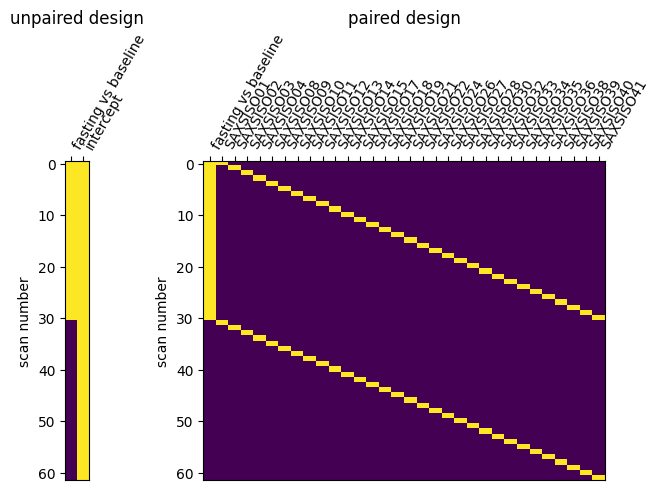

In [13]:

_, (ax_unpaired, ax_paired) = plt.subplots(
    1,
    2,
    gridspec_kw={"width_ratios": [1, 17]},
    constrained_layout=True,
)


plot_design_matrix(unpaired_design_matrix, rescale=False, axes=ax_unpaired)
plot_design_matrix(paired_design_matrix, rescale=False, axes=ax_paired)
ax_unpaired.set_title("unpaired design", fontsize=12)
ax_paired.set_title("paired design", fontsize=12)


In [15]:
from nilearn.glm.second_level import SecondLevelModel

second_level_model_unpaired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=unpaired_design_matrix
)

In [16]:
second_level_model_paired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=paired_design_matrix
)

In [17]:
stat_maps_unpaired = second_level_model_unpaired.compute_contrast(
    "fasting vs baseline", output_type="all"
)
stat_maps_unpaired

ValueError: design_matrix does not match the number of maps considered. 62 rows in design matrix do not match with 63 maps.

In [ ]:
stat_maps_paired = second_level_model_paired.compute_contrast(
    "fasting vs baseline", output_type="all"
)
stat_maps_paired

{'z_score': <nibabel.nifti1.Nifti1Image at 0x7fe5399eec40>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x7fe5399ee040>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x7fe539a12670>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x7fe5399f6a90>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7fe539b631f0>}

In [ ]:
(
    stat_maps_unpaired["effect_size"].get_fdata()
    - stat_maps_paired["effect_size"].get_fdata()
).max()

4.198030811863873e-16

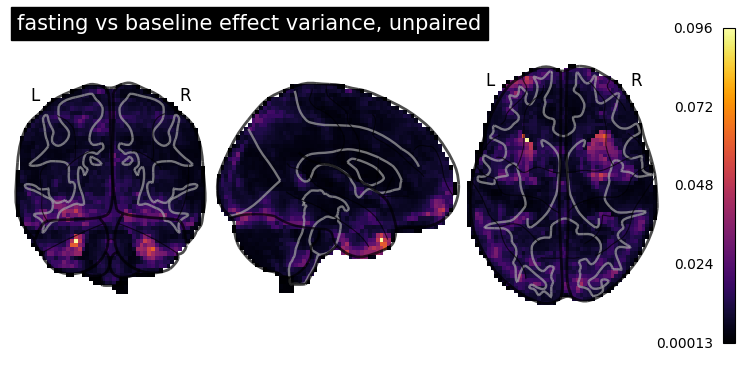

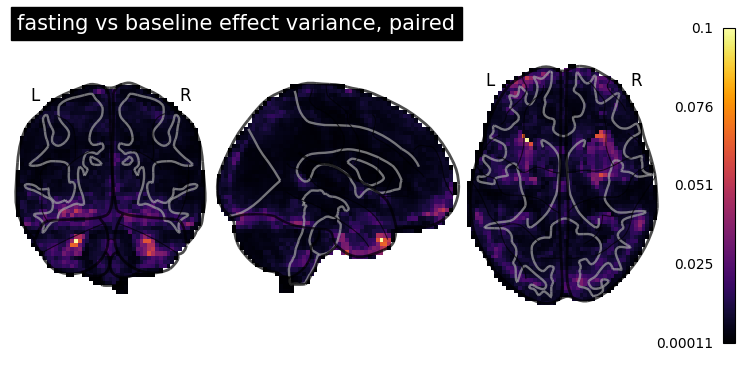

In [ ]:
plot_glass_brain(
    stat_maps_unpaired["effect_variance"],
    cmap="inferno",
    title="fasting vs baseline effect variance, unpaired",
)

plot_glass_brain(
    stat_maps_paired["effect_variance"],
    cmap="inferno",
    title="fasting vs baseline effect variance, paired",
)

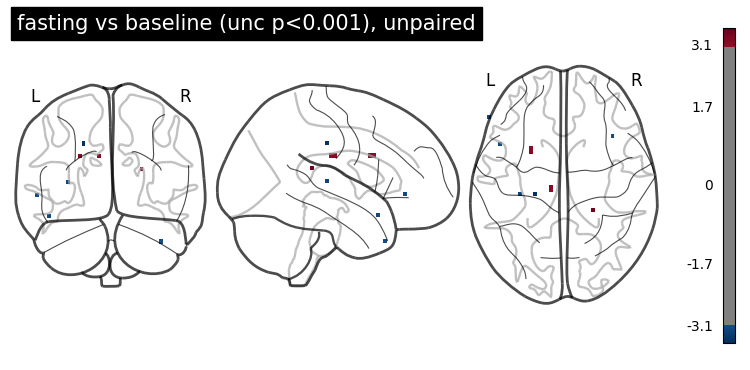

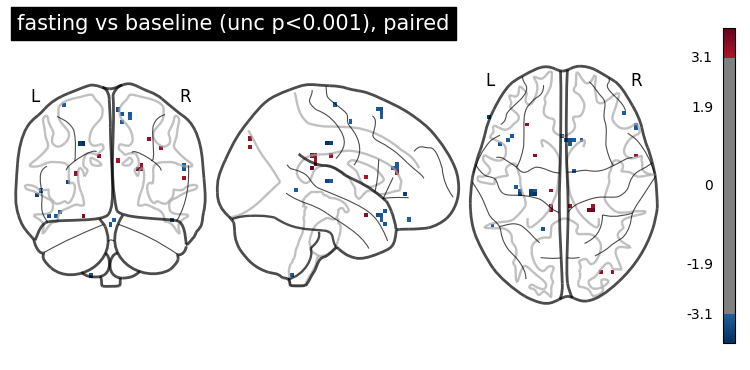

In [ ]:
threshold = 3.1  # corresponds to  p < .001, uncorrected
plot_glass_brain(
    stat_maps_unpaired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="fasting vs baseline (unc p<0.001), unpaired",
)

plot_glass_brain(
    stat_maps_paired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="fasting vs baseline (unc p<0.001), paired",
)


### The inf result here means that no voxel in z-map survived the FDR correction at α = 0.05 — in other words, once you control for multiple comparisons, there are no statistically significant effects.

In [ ]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_unpaired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

inf


/tmp/ipykernel_2644398/60165119.py:1: UserWarning: The given float value must not exceed 3.48370451089722. But, you have given threshold=inf.
  _, threshold_corrected = threshold_stats_img(


In [ ]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_paired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

inf


/tmp/ipykernel_2644398/551658079.py:1: UserWarning: The given float value must not exceed 3.8043991477678953. But, you have given threshold=inf.
  _, threshold_corrected = threshold_stats_img(


# Social isolation VS baseline
## Social > control

In [ ]:
n_subjects = len(social_participants)
n_subjects

31

In [ ]:
second_level_input = social_maps + baseline_maps
second_level_input

['/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO01s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO02s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO03s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO04s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO08s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO09s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO10s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO11s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO12s/food_gt_control_effsize.nii.gz',
 '/local/anpa/ds003242-1.0.0/derivatives//firstlevel/sub-SAXSISO13s/food_gt_control_effsize

In [ ]:
condition_effect = np.hstack(([1] * n_subjects, [0] * n_subjects))
condition_effect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
subject_effect = np.vstack((np.eye(n_subjects), np.eye(n_subjects)))
subject_effect

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
subjects = [p[:-1] for p in social_participants]
subjects

['SAXSISO01',
 'SAXSISO02',
 'SAXSISO03',
 'SAXSISO04',
 'SAXSISO08',
 'SAXSISO09',
 'SAXSISO10',
 'SAXSISO11',
 'SAXSISO12',
 'SAXSISO13',
 'SAXSISO14',
 'SAXSISO15',
 'SAXSISO17',
 'SAXSISO18',
 'SAXSISO19',
 'SAXSISO21',
 'SAXSISO22',
 'SAXSISO24',
 'SAXSISO26',
 'SAXSISO27',
 'SAXSISO28',
 'SAXSISO30',
 'SAXSISO32',
 'SAXSISO33',
 'SAXSISO34',
 'SAXSISO35',
 'SAXSISO36',
 'SAXSISO38',
 'SAXSISO39',
 'SAXSISO40',
 'SAXSISO41']

In [ ]:
unpaired_design_matrix = pd.DataFrame(
    {
        "social vs baseline": condition_effect,
        "intercept": 1,
    }
)
unpaired_design_matrix


,social vs baseline,intercept
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
57,0,1
58,0,1
59,0,1
60,0,1


In [ ]:
paired_design_matrix = pd.DataFrame(
    np.hstack((condition_effect[:, np.newaxis], subject_effect)),
    columns=["social vs baseline", *subjects],
)
paired_design_matrix

,social vs baseline,SAXSISO01,SAXSISO02,SAXSISO03,SAXSISO04,SAXSISO08,SAXSISO09,SAXSISO10,SAXSISO11,SAXSISO12,...,SAXSISO30,SAXSISO32,SAXSISO33,SAXSISO34,SAXSISO35,SAXSISO36,SAXSISO38,SAXSISO39,SAXSISO40,SAXSISO41
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Text(0.5, 1.0, 'paired design')

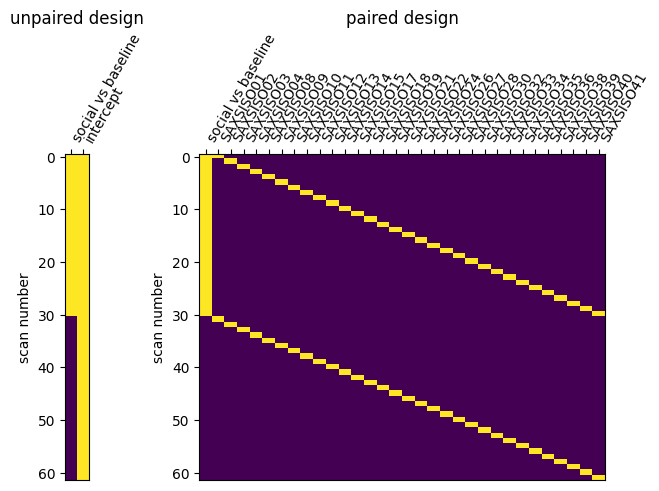

In [ ]:
_, (ax_unpaired, ax_paired) = plt.subplots(
    1,
    2,
    gridspec_kw={"width_ratios": [1, 17]},
    constrained_layout=True,
)


plot_design_matrix(unpaired_design_matrix, rescale=False, axes=ax_unpaired)
plot_design_matrix(paired_design_matrix, rescale=False, axes=ax_paired)
ax_unpaired.set_title("unpaired design", fontsize=12)
ax_paired.set_title("paired design", fontsize=12)

In [ ]:
second_level_model_unpaired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=unpaired_design_matrix, standardize=False
)

In [ ]:
second_level_model_paired = SecondLevelModel(n_jobs=2).fit(
    second_level_input, design_matrix=paired_design_matrix, standardize=False
)

In [ ]:
stat_maps_unpaired = second_level_model_unpaired.compute_contrast(
    "social vs baseline", output_type="all"
)
stat_maps_unpaired

{'z_score': <nibabel.nifti1.Nifti1Image at 0x7fe5399f68e0>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x7fe5399f6880>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x7fe55017f700>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x7fe5386a3e20>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7fe5386a3730>}

In [ ]:
stat_maps_paired = second_level_model_paired.compute_contrast(
    "social vs baseline", output_type="all"
)
stat_maps_paired

{'z_score': <nibabel.nifti1.Nifti1Image at 0x7fe538909790>,
 'stat': <nibabel.nifti1.Nifti1Image at 0x7fe5386a3df0>,
 'p_value': <nibabel.nifti1.Nifti1Image at 0x7fe495c01dc0>,
 'effect_size': <nibabel.nifti1.Nifti1Image at 0x7fe5386a34f0>,
 'effect_variance': <nibabel.nifti1.Nifti1Image at 0x7fe49610d100>}

In [ ]:
(
    stat_maps_unpaired["effect_size"].get_fdata()
    - stat_maps_paired["effect_size"].get_fdata()
).max()
# 1.1102230246251565e-15


2.42861286636753e-16

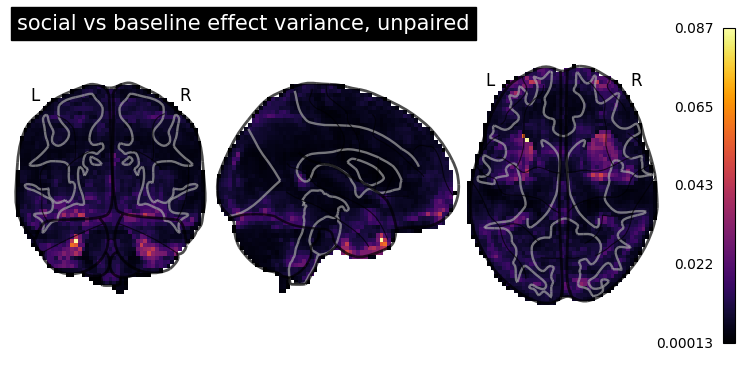

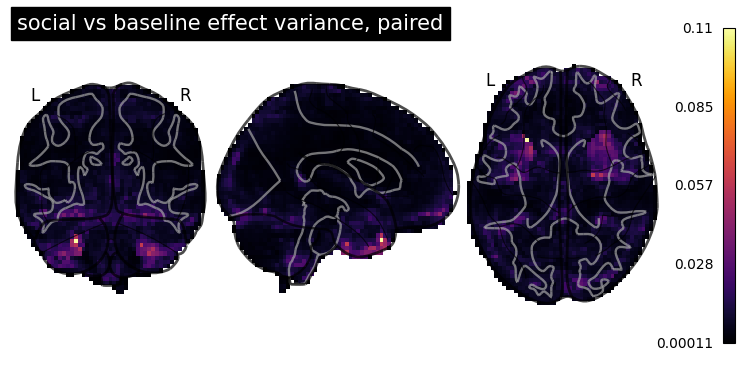

In [ ]:
plot_glass_brain(
    stat_maps_unpaired["effect_variance"],
    cmap="inferno",
    title="social vs baseline effect variance, unpaired",
)

plot_glass_brain(
    stat_maps_paired["effect_variance"],
    cmap="inferno",
    title="social vs baseline effect variance, paired",
)

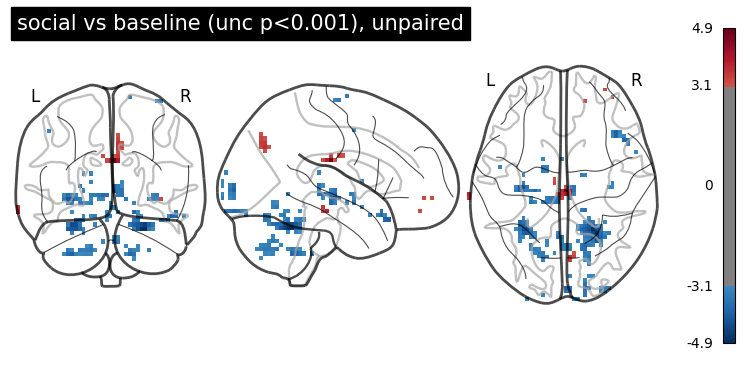

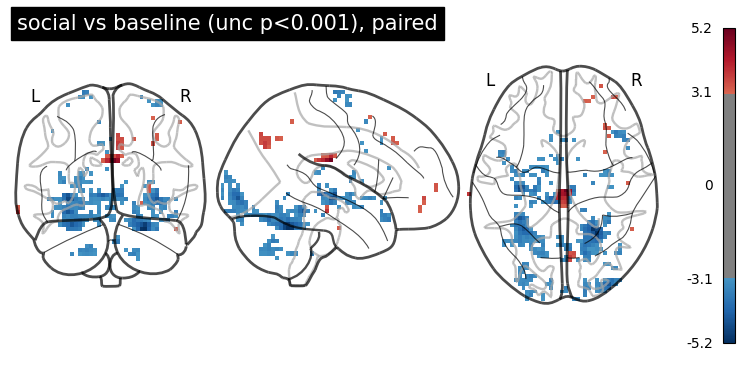

In [ ]:
threshold = 3.1  # corresponds to  p < .001, uncorrected
plot_glass_brain(
    stat_maps_unpaired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="social vs baseline (unc p<0.001), unpaired",
)

plot_glass_brain(
    stat_maps_paired["z_score"],
    threshold=threshold,
    plot_abs=False,
    title="social vs baseline (unc p<0.001), paired",
)

In [ ]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_unpaired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

4.784271155151322


In [ ]:
_, threshold_corrected = threshold_stats_img(
    stat_maps_paired["z_score"], alpha=0.05, height_control='fdr'
)
print(threshold_corrected)

4.295397079402498


In [ ]:
_

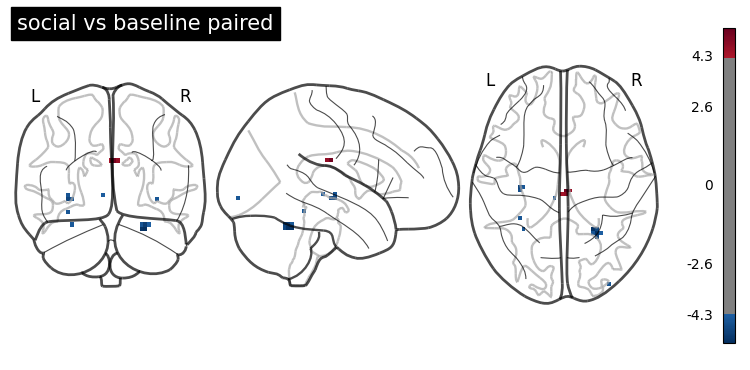

In [ ]:
plot_glass_brain(
    _,
    threshold=threshold_corrected,
    plot_abs=False,
    title="social vs baseline paired",
)